In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../csv/churn.csv')
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


<Axes: xlabel='Exited', ylabel='CreditScore'>

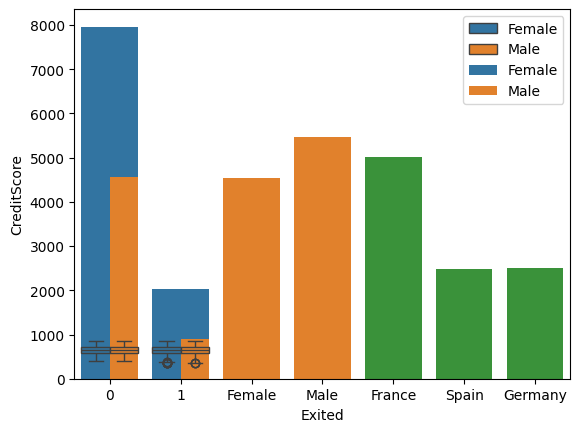

In [3]:
sns.boxplot(x="Exited", y = 'CreditScore', data=df, hue="Gender")
sns.countplot(x="Exited", data=df)

sns.countplot(x="Exited", data=df, hue='Gender')
sns.countplot(x="Gender", data=df)
sns.countplot(x="Geography", data=df)



In [4]:
'''
X = dataset.iloc[:, 1:11].values
y = dataset['Left'].values


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]
'''
df.head(2)
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
x = df.iloc[:,2:12]
y = df['Exited']
print(x.columns)

x= pd.get_dummies(x, drop_first=True)

#x.drop(['Gender','Geography'], inplace = True, axis = 1)

#x = pd.concat([d,x], axis=1)
print(x.columns)



Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



In [7]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import Dropout

model= Sequential()

model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# model.add(Dropout(p = 0.1))

# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dropout(p = 0.1))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 10)



Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7846 - loss: 0.5594
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7960 - loss: 0.5229
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7960 - loss: 0.5142
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7960 - loss: 0.5113
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7960 - loss: 0.5090
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7960 - loss: 0.5057
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7960 - loss: 0.5047
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7960 - loss: 0.5061
Epoch 9/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7960 - loss: 0.5034
Epoch 10/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7960 - loss: 0.5048


In [8]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

y_test.head(5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
#(1551+136)/2000



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[1595,    0],
       [ 405,    0]])

In [9]:
#Evaluating a ANN

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def fn():
    model= Sequential()
    model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn= fn,  batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = model, X=X_train, y=y_train,cv = 10, n_jobs=-1)
mean = accuracies.mean()
variance = accuracies.std()
accuracies



array([0.78625, 0.79   , 0.8    , 0.7825 , 0.81625, 0.81   , 0.7875 ,
       0.79375, 0.79875, 0.795  ])

In [11]:
# Improving the ANN

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense



In [ ]:
# Dropout regularisation technique
def fn():
    model = Sequential()
    model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = fn)
parameters = {"batch_size" : [25,35],
              "epochs" : [100,200],
              "optimizer" : ["adam","rmsprop"]}

grid_search = GridSearchCV(estimator = model,param_grid = parameters,scoring = "accuracy", cv = 5)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


Epoch 1/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7814 - loss: 0.6101
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7980 - loss: 0.5264
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7980 - loss: 0.5207
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7980 - loss: 0.5146
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7980 - loss: 0.5104
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7980 - loss: 0.5058
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.5069
Epoch 8/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.5066
Epoch 9/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.5053
Epoch 10/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7980 - loss: 0.5031
Epoch 11/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7980 - loss: 0.5024
Epoch 12/100
256/256 ━━━━━━━━━━━━━━━━━━━━

In [17]:
best_accuracy

np.float64(0.796)

In [18]:
best_parameters

{'batch_size': 25, 'epochs': 100, 'optimizer': 'adam'}